# <center>Credit Fraud Detector</center></h1>

## Introduction:
<br>
    The aim of this project is predicting whether a transaction is a normal payment or a fraud.

   This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, data cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

## Steps of the project:

- Dataset has imblanced ratio between fraud and normal payment count. Therefore, I used undersampling to obtain equally distributed class.

- I compared different models score with cross validation to choose best model.

- Hyperparameter tunning aplied to increase score

- Model score tested with subset of feature obtained by RFE.

- Model Score tested with subset of feature with feature importance based elimnation.

- Compared 3 solutions scores and fitting time.

    

# Import dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import time

import warnings
warnings.filterwarnings('ignore')
np.random.seed(1001)

# load dataset
df = pd.read_csv("creditcard.csv")

print ("df Shape: ", df.shape)

df.head()





/Users/erdemarisoy/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


df Shape:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [2]:
# No Null Values
df.isnull().sum().max()

0

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

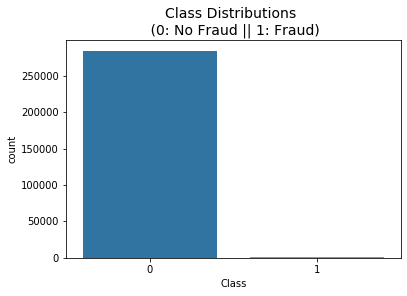

In [4]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Splitting the Data (Original DataFrame)

Before proceeding with the Random UnderSampling technique I separated the orginal dataframe for testing purposes. 

In [66]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 56959  56960  56961 ... 284804 284805 284806] Test: [    0     1     2 ... 57033 57256 57882]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56959  56960  56961 ... 121745 122349 122407]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113905 113906 113907 ... 170883 170884 170885]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170622 170886 170887 ... 227843 227917 228813]
Train: [     0      1      2 ... 227843 227917 228813] Test: [227844 227845 227846 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


## UnderSampling

In [81]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278636,168329.0,0.145717,1.143959,-0.156505,0.705763,0.789229,-1.180633,1.426575,-0.573844,-1.192702,...,0.259375,0.953349,-0.383957,0.165910,0.132815,0.668570,0.125764,0.141447,18.29,0
81609,59011.0,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
135770,81390.0,1.497425,-1.022098,0.318638,-1.514138,-1.344719,-0.512039,-1.029493,-0.072168,-2.057533,...,-0.185743,-0.187052,-0.017707,-0.017207,0.395885,-0.203136,0.024308,0.007409,15.00,0
17480,28755.0,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,-3.565738,...,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,99.99,1
29687,35585.0,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,...,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.76,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


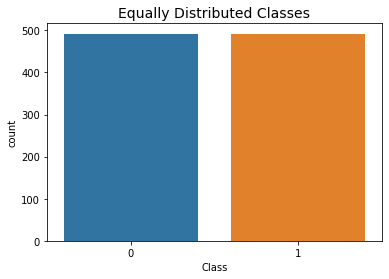

In [82]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [83]:
# Undersampling before cross validating
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Cross validation Model Comparison for choosing best model

- I compared 8 model's ROC_AUC, accuracy, precision, recall score with cross valiadation and chose best performing model before hytperparameter tunning.

- I compared features importance for different models.

## Decision Tree

In [9]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test)


feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

clf_score_accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
clf_roc_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
clf_score_precision = cross_val_score(clf, X, y, cv=10, scoring='precision')
clf_score_recall = cross_val_score(clf, X, y, cv=10, scoring='recall')

print(clf_roc_auc)
print("Mean AUC Score: ", clf_roc_auc.mean())
print("Mean Accuracy Score: ", clf_score_accuracy.mean())
print("Mean Precision Score: ", clf_score_precision.mean())
print("Mean Recall: ", clf_score_recall.mean())

print(feature_importances)


[0.89918367 0.90918367 0.92918367 0.88857143 0.8877551  0.93877551
 0.92857143 0.90816327 0.95918367 0.89795918]
Mean AUC Score:  0.9146530612244899
Mean Accuracy Score:  0.9187074829931973
Mean Precision Score:  0.9123566286071304
Mean Recall:  0.9145714285714286
        importance
V14       0.753200
V4        0.041259
V11       0.029157
V26       0.024164
V7        0.023418
V20       0.018825
V23       0.018704
V3        0.013636
V12       0.012074
V17       0.011304
V15       0.010870
V24       0.008016
V27       0.007337
V22       0.006104
V21       0.004999
V10       0.004953
V19       0.004730
Amount    0.004360
V13       0.002889
V18       0.000000
V16       0.000000
V1        0.000000
V9        0.000000
V8        0.000000
V6        0.000000
V25       0.000000
V5        0.000000
V2        0.000000
V28       0.000000
Time      0.000000


## BaggingClassifier

In [10]:

# Create Decision Tree classifer object
bcg = BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=42)

# Train Decision Tree Classifer
bcg = bcg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test)


featimp = np.mean([
   tree.feature_importances_ for tree in bcg.estimators_
], axis=0)

feature_importances = pd.DataFrame(featimp,
                                  index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

bcg_score_accuracy = cross_val_score(bcg, X, y, cv=10, scoring='accuracy')
bcg_roc_auc = cross_val_score(bcg, X, y, cv=10, scoring='roc_auc')
bcg_score_precision = cross_val_score(bcg, X, y, cv=10, scoring='precision')
bcg_score_recall = cross_val_score(bcg, X, y, cv=10, scoring='recall')

print(bcg_roc_auc)
print("Mean AUC Score: ", bcg_roc_auc.mean())
print("Mean Accuracy Score: ", bcg_score_accuracy.mean())
print("Mean Precision Score: ", bcg_score_precision.mean())
print("Mean Recall: ", bcg_score_recall.mean())

print(feature_importances)




[0.98571429 0.95959184 0.99530612 0.9855102  0.97688463 0.98354852
 0.98542274 0.97834236 0.98146606 0.97480217]
Mean AUC Score:  0.98065889212828
Mean Accuracy Score:  0.9390125747268605
Mean Precision Score:  0.9635079658752185
Mean Recall:  0.9144489795918368
        importance
V14       0.754566
V4        0.040029
V7        0.016030
V11       0.014304
V8        0.012869
V19       0.011617
Amount    0.011583
V13       0.010280
V20       0.009874
V3        0.009872
V9        0.008806
V12       0.008760
V23       0.008063
V26       0.007903
V15       0.007656
V16       0.007601
V10       0.006804
V1        0.006117
V22       0.005948
V25       0.005425
V17       0.005326
V27       0.005138
V6        0.004066
V21       0.003870
V28       0.003509
V24       0.003498
V5        0.002983
Time      0.002771
V2        0.002393
V18       0.002339


## RandomForestClassifier

In [11]:
rfc = RandomForestClassifier(n_estimators=100, max_features=10)

rfc = rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred3 = rfc.predict(X_test)


feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


rfc_score_accuracy = cross_val_score(rfc, X, y, cv=10, scoring='accuracy')
rfc_roc_auc = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
rfc_score_precision = cross_val_score(rfc, X, y, cv=10, scoring='precision')
rfc_score_recall = cross_val_score(rfc, X, y, cv=10, scoring='recall')
rfc_score_f1 = cross_val_score(rfc, X, y, cv=10, scoring='f1')

print(rfc_roc_auc)
print("Mean AUC Score: ", rfc_roc_auc.mean())
print("Mean Accuracy Score: ", rfc_score_accuracy.mean())
print("Mean Precision Score: ", rfc_score_precision.mean())
print("Mean Recall: ", rfc_score_recall.mean())


print(feature_importances)



[0.98571429 0.95918367 0.99653061 0.98836735 0.96834652 0.98000833
 0.98896293 0.97334444 0.98958767 0.97292795]
Mean AUC Score:  0.9802973760932943
Mean Accuracy Score:  0.9339517625231911
Mean Precision Score:  0.96614828606949
Mean Recall:  0.9064081632653063
        importance
V14       0.341782
V10       0.173842
V12       0.089059
V17       0.081739
V4        0.058922
V11       0.036654
V16       0.030817
V7        0.019991
V19       0.015597
Amount    0.014056
V20       0.013835
V3        0.011277
V8        0.009448
V23       0.009076
V9        0.008935
V15       0.008402
V21       0.008117
V27       0.007492
V13       0.007327
V26       0.006712
V25       0.005951
V22       0.005949
V5        0.005292
V6        0.005266
V1        0.004978
Time      0.004303
V24       0.004168
V28       0.003832
V2        0.003780
V18       0.003400


## AdaBoostClassifier

In [12]:
# Create Decision Tree classifer object
abc = AdaBoostClassifier(n_estimators=100, random_state=42)

abc = abc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred4 = abc.predict(X_test)

feature_importances = pd.DataFrame(abc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

abc_score_accuracy = cross_val_score(abc, X, y, cv=10, scoring='accuracy')
abc_roc_auc = cross_val_score(abc, X, y, cv=10, scoring='roc_auc')
abc_score_precision = cross_val_score(abc, X, y, cv=10, scoring='precision')
abc_score_recall = cross_val_score(abc, X, y, cv=10, scoring='recall')

print(abc_roc_auc)
print("Mean AUC Score: ", abc_roc_auc.mean())
print("Mean Accuracy Score: ", abc_score_accuracy.mean())
print("Mean Precision Score: ", abc_score_precision.mean())
print("Mean Recall: ", abc_score_recall.mean())

print(feature_importances)



[0.98244898 0.97673469 0.99306122 0.97183673 0.969596   0.97209496
 0.99083715 0.98375677 0.96043315 0.97542691]
Mean AUC Score:  0.9776226572261557
Mean Accuracy Score:  0.9400432900432902
Mean Precision Score:  0.9576278335191379
Mean Recall:  0.9225714285714286
        importance
V4            0.10
V14           0.08
V19           0.07
V3            0.06
Amount        0.05
V16           0.05
V7            0.05
V26           0.04
V10           0.04
V28           0.04
V11           0.03
V12           0.03
V8            0.03
V6            0.03
V5            0.03
V18           0.03
V20           0.03
V27           0.02
V22           0.02
V25           0.02
V23           0.02
Time          0.02
V21           0.02
V17           0.02
V9            0.02
V2            0.02
V15           0.02
V1            0.01
V24           0.00
V13           0.00


## GradientBoostingClassifier

In [13]:
sgb = GradientBoostingClassifier(n_estimators=100, random_state=42)

sgb = sgb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred5 = sgb.predict(X_test)

feature_importances = pd.DataFrame(sgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


sgb_score_accuracy = cross_val_score(sgb, X, y, cv=10, scoring='accuracy')
sgb_roc_auc = cross_val_score(sgb, X, y, cv=10, scoring='roc_auc')
sgb_score_precision = cross_val_score(sgb, X, y, cv=10, scoring='precision')
sgb_score_recall = cross_val_score(sgb, X, y, cv=10, scoring='recall')

print(sgb_roc_auc)
print("Mean AUC Score: ", sgb_roc_auc.mean())
print("Mean Accuracy Score: ", sgb_score_accuracy.mean())
print("Mean Precision Score: ", sgb_score_precision.mean())
print("Mean Recall: ", sgb_score_recall.mean())


print(feature_importances)



[0.98244898 0.97632653 0.99510204 0.98612245 0.97084548 0.9879217
 0.99291962 0.98458975 0.98375677 0.96834652]
Mean AUC Score:  0.9828379841732613
Mean Accuracy Score:  0.9410430839002268
Mean Precision Score:  0.9677988850349099
Mean Recall:  0.9144081632653063
        importance
V14       0.735875
V4        0.064674
V10       0.041484
V7        0.020720
V20       0.013627
V11       0.012909
V19       0.010470
V3        0.010439
Amount    0.010017
V12       0.009874
V23       0.009712
V9        0.007155
V8        0.006687
V17       0.006210
V16       0.006118
V26       0.005866
V27       0.005023
V25       0.003138
V22       0.003110
V13       0.002782
V21       0.002089
V15       0.002013
V18       0.001989
V28       0.001865
Time      0.001773
V1        0.001448
V24       0.001020
V2        0.000968
V6        0.000514
V5        0.000433


## XgBoost Classifier

In [14]:
xgb = XGBClassifier(objective='binary:logistic')
xgb.fit(X_train,y_train, eval_metric='auc')

#Predict the response for test dataset
y_pred6 = xgb.predict(X_test)

feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


xgb_score_accuracy = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
xgb_roc_auc = cross_val_score(xgb, X, y, cv=10, scoring='roc_auc')
xgb_score_precision = cross_val_score(xgb, X, y, cv=10, scoring='precision')
xgb_score_recall = cross_val_score(xgb, X, y, cv=10, scoring='recall')

print(xgb_roc_auc)
print("Mean AUC Score: ", xgb_roc_auc.mean())
print("Mean Accuracy Score - DTR: ", xgb_score_accuracy.mean())
print("Mean Precision Score - DTR: ", xgb_score_precision.mean())
print("Mean Recall - DTR: ", xgb_score_recall.mean())

print(feature_importances)



[0.98204082 0.97714286 0.99591837 0.99061224 0.97126197 0.98542274
 0.98958767 0.98542274 0.97251145 0.97709288]
Mean AUC Score:  0.9827013744273219
Mean Accuracy Score - DTR:  0.942063492063492
Mean Precision Score - DTR:  0.9681480567726769
Mean Recall - DTR:  0.9164489795918367
        importance
V14       0.483070
V10       0.086910
V4        0.030369
V20       0.025419
V23       0.024421
V7        0.023505
V8        0.022442
Amount    0.022255
V11       0.022156
V16       0.021742
V9        0.020379
V17       0.019952
V12       0.019252
V19       0.017596
V13       0.015317
V3        0.014972
V25       0.012052
V28       0.011849
V24       0.010887
V1        0.010741
V15       0.009860
V2        0.009310
V22       0.009210
V5        0.009160
V6        0.009115
V26       0.008925
V27       0.007965
V18       0.007409
Time      0.007291
V21       0.006468


## Lightgbm 

In [15]:
lgbm = lgb.LGBMClassifier()

lgbm.fit(X_train,y_train, eval_metric='auc')

#Predict the response for test dataset
y_pred7 = lgbm.predict(X_test)

feature_importances = pd.DataFrame(lgbm.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


lgbm_score_accuracy = cross_val_score(lgbm, X, y, cv=10, scoring='accuracy')
lgbm_roc_auc = cross_val_score(lgbm, X, y, cv=10, scoring='roc_auc')
lgbm_score_precision = cross_val_score(lgbm, X, y, cv=10, scoring='precision')
lgbm_score_recall = cross_val_score(lgbm, X, y, cv=10, scoring='recall')

print(lgbm_roc_auc)
print("Mean AUC Score: ", lgbm_roc_auc.mean())
print("Mean Accuracy Score: ", lgbm_score_accuracy.mean())
print("Mean Precision Score: ", lgbm_score_precision.mean())
print("Mean Recall: ", lgbm_score_recall.mean())

print(feature_importances)


[0.98734694 0.97673469 0.99428571 0.99183673 0.96834652 0.98292378
 0.98750521 0.98292378 0.98667222 0.97126197]
Mean AUC Score:  0.9829837567680133
Mean Accuracy Score:  0.9339208410636983
Mean Precision Score:  0.9653339671771679
Mean Recall:  0.9022857142857144
        importance
V4             257
V14            178
V10            158
Time           147
V8             143
V17            139
V19            134
V13            105
Amount         101
V16             94
V18             92
V23             88
V2              87
V26             87
V7              87
V11             85
V12             83
V5              81
V28             77
V20             76
V15             73
V3              71
V22             69
V1              64
V27             64
V6              64
V25             59
V24             55
V21             52
V9              46


## CatBoost Classifier

In [16]:
cb = CatBoostClassifier(silent=True,iterations=300)

cb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred8 = cb.predict(X_test)

feature_importances = pd.DataFrame(cb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


cb_score_accuracy = cross_val_score(cb, X, y, cv=10, scoring='accuracy')
cb_roc_auc = cross_val_score(cb, X, y, cv=10, scoring='roc_auc')
cb_score_precision = cross_val_score(cb, X, y, cv=10, scoring='precision')
cb_score_recall = cross_val_score(cb, X, y, cv=10, scoring='recall')

print(cb_roc_auc)
print("Mean AUC Score: ", cb_roc_auc.mean())
print("Mean Accuracy Score: ", cb_score_accuracy.mean())
print("Mean Precision Score: ", cb_score_precision.mean())
print("Mean Recall: ", cb_score_recall.mean())

print(feature_importances)

[0.98979592 0.98408163 0.99591837 0.9922449  0.96876302 0.99042066
 0.99208663 0.98000833 0.98542274 0.97042899]
Mean AUC Score:  0.9849171178675553
Mean Accuracy Score:  0.9410533910533913
Mean Precision Score:  0.9776533540067917
Mean Recall:  0.9043265306122448
        importance
V14      22.031655
V4       10.497207
V10       6.705478
V11       4.267767
V17       3.969261
V13       3.731655
V8        3.622685
V3        3.321274
V7        3.306474
Amount    3.104992
V19       3.013195
V12       2.804290
V16       2.612115
V2        2.404453
V1        2.252621
V26       1.950779
V25       1.804042
V20       1.798515
V21       1.713435
V27       1.690967
V18       1.634715
V9        1.564087
V5        1.521672
V28       1.513750
V6        1.265729
V15       1.264443
V22       1.202807
V23       1.167847
Time      1.164869
V24       1.097221


### Winning Model : GradientBoosting

- Catboost algorithm provide little higher score than GradientBoosting, however I choosed Gradient Boosting due to shorter running time

In [17]:
#DT
print('Decision Tree|',"Mean AUC Score: ", clf_roc_auc.mean(),'-',"Mean Accuracy Score: ", clf_score_accuracy.mean() )

#BC
print('Begging Classifier|',"Mean AUC Score: ", bcg_roc_auc.mean(),'-',"Mean Accuracy Score: ", bcg_score_accuracy.mean() )

#randomforest
print('Random Forest|',"Mean AUC Score: ", rfc_roc_auc.mean(),'-',"Mean Accuracy Score: ", rfc_score_accuracy.mean() )

#adaboost
print('AdaBoost Classifier|',"Mean AUC Score: ", abc_roc_auc.mean(),'-',"Mean Accuracy Score: ", abc_score_accuracy.mean() )

#gradient boost 
print('Gradient Boosting|',"Mean AUC Score: ", sgb_roc_auc.mean(),'-',"Mean Accuracy Score: ", sgb_score_accuracy.mean() )

#xgboost
print('XgBoost|',"Mean AUC Score: ", xgb_roc_auc.mean(),'-',"Mean Accuracy Score: ", xgb_score_accuracy.mean() )

#lightgbm
print('Lightgbm|',"Mean AUC Score: ", lgbm_roc_auc.mean(),'-',"Mean Accuracy Score: ", lgbm_score_accuracy.mean() )

#catboost
print('CatBoost|',"Mean AUC Score: ", cb_roc_auc.mean(),'-',"Mean Accuracy Score: ", cb_score_accuracy.mean() )

Decision Tree| Mean AUC Score:  0.9146530612244899 - Mean Accuracy Score:  0.9187074829931973
Begging Classifier| Mean AUC Score:  0.98065889212828 - Mean Accuracy Score:  0.9390125747268605
Random Forest| Mean AUC Score:  0.9802973760932943 - Mean Accuracy Score:  0.9339517625231911
AdaBoost Classifier| Mean AUC Score:  0.9776226572261557 - Mean Accuracy Score:  0.9400432900432902
Gradient Boosting| Mean AUC Score:  0.9828379841732613 - Mean Accuracy Score:  0.9410430839002268
XgBoost| Mean AUC Score:  0.9827013744273219 - Mean Accuracy Score:  0.942063492063492
Lightgbm| Mean AUC Score:  0.9829837567680133 - Mean Accuracy Score:  0.9339208410636983
CatBoost| Mean AUC Score:  0.9849171178675553 - Mean Accuracy Score:  0.9410533910533913


# Hyperparameter-Tuning

I applied manual, random search and grid search method to get best result from Gradient Boosting. Then I compared results.

In [18]:
print("Orginal")
model = GradientBoostingClassifier(random_state= 101).fit(X_train,y_train)
predictionGrdBoost = model.predict(X_test)
print('Confusion Martix:',confusion_matrix(y_test,predictionGrdBoost))
print('Accuracy:',metrics.accuracy_score(y_test,predictionGrdBoost))
print('ROC_AUC:',metrics.roc_auc_score(y_test,predictionGrdBoost))
acc1 = metrics.accuracy_score(y_test,predictionGrdBoost)
roc1 = metrics.roc_auc_score(y_test,predictionGrdBoost)

Orginal
Confusion Martix: [[ 85   2]
 [  4 106]]
Accuracy: 0.9695431472081218
ROC_AUC: 0.9703239289446186


### Manual Search

In [19]:
print("Manual")
model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, random_state= 101,
                                   min_samples_split=0.8,
                                  min_samples_leaf=0.2,
                                  max_depth=10).fit(X_train,y_train)
predictionGrdBoost = model.predict(X_test)
print('Confusion Martix:',confusion_matrix(y_test,predictionGrdBoost))
print('Accuracy:',metrics.accuracy_score(y_test,predictionGrdBoost))
print('ROC_AUC:',metrics.roc_auc_score(y_test,predictionGrdBoost))
acc2 = metrics.accuracy_score(y_test,predictionGrdBoost)
roc2 = metrics.roc_auc_score(y_test,predictionGrdBoost)

Manual
Confusion Martix: [[ 85   2]
 [  6 104]]
Accuracy: 0.9593908629441624
ROC_AUC: 0.9612330198537095


### Random Search

In [20]:
random_search = {'learning_rate':  [0.1,0.3,1],
               'n_estimators':[10,20,30,50,100,500],
                'max_depth':[2,3,4,5,6,7],
                'min_samples_split':[2,4,6,8,10,20,40,60,100],
                'min_samples_split':[2,4,6,8,10,20,40,60,100],
                'min_samples_leaf':[1,3,5,7,9]}

clf = GradientBoostingClassifier()
model =RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions = random_search, 
                               cv = 2, n_iter = 10)

model.fit(X_train,y_train)

print("Random")
predictionGrdBoost = model.best_estimator_.predict(X_test)
print('Confusion Martix:',confusion_matrix(y_test,predictionGrdBoost))
print('Accuracy:',metrics.accuracy_score(y_test,predictionGrdBoost))
print('ROC_AUC:',metrics.roc_auc_score(y_test,predictionGrdBoost))
acc3 = metrics.accuracy_score(y_test,predictionGrdBoost)
roc3 = metrics.roc_auc_score(y_test,predictionGrdBoost)

Random
Confusion Martix: [[ 84   3]
 [  4 106]]
Accuracy: 0.9644670050761421
ROC_AUC: 0.964576802507837


### Grid Seach

I completed grid search in 4 step. I tried to find best value for only one parameter in each step due to long run time.

In [21]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10), 
            param_grid = p_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 0.64491177,  1.55092497,  2.0773272 ,  2.65884771,  2.96526599,
          2.59213705,  2.5297102 ,  2.61187425,  0.65600643,  1.62591615,
          2.94828997,  4.19793105,  3.93867269,  3.45404019,  3.73826656,
          3.73554049,  0.72314391,  1.63096843,  3.34091301,  5.25929894,
          6.01862082,  6.39921207,  6.46084652,  6.19159746,  0.64256659,
          1.60685124,  3.1983923 ,  4.83089299,  6.7185102 ,  8.72372394,
         10.21142197, 11.98252287,  0.66329784,  1.68123446,  3.25254326,
          5.13920603,  7.4779851 ,  8.64113445, 11.35192819, 11.29906778,
          0.61797638,  1.58538518,  3.20011525,  4.88328023,  6.82198739,
          8.91827836, 11.40276814, 10.8177845 ]),
  'std_fit_time': array([0.01167219, 0.00299894, 0.1619163 , 0.29387855, 0.19371123,
         0.09306596, 0.10138502, 0.08088321, 0.02134909, 0.04815509,
         0.18260098, 0.80343788, 0.74727683, 0.14746609, 0.13680675,
         0.09769176, 0.02689832, 0.04261825,

In [22]:
p_test4 = {'max_depth':[2,3,4,5,6,7]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500), 
            param_grid = p_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


({'mean_fit_time': array([2.30174017, 2.16443758, 1.803301  , 1.41126623, 1.36127357,
         1.11667147]),
  'std_fit_time': array([0.01774832, 0.23874203, 0.06120255, 0.05097501, 0.14765564,
         0.19374561]),
  'mean_score_time': array([0.00382886, 0.00434957, 0.00354967, 0.00406609, 0.00407081,
         0.00404415]),
  'std_score_time': array([9.30050800e-05, 1.24703430e-03, 1.87814141e-04, 8.83862578e-04,
         6.30865299e-04, 2.00600660e-03]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.97210197, 0.97274331, 0.97258297, 0.97739298, 0.97755331,
         0.95719096]),
  'split1_test_score': array([0.98092031, 0.98156165, 0.97931698, 0.98059965, 0.98140131,
         0.98011865])

In [23]:
p_test5 = {'min_samples_split':[2,4,6,8,10,20,40,60,100]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500,
                                                            max_depth=5), 
            param_grid = p_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_




({'mean_fit_time': array([1.76450081, 1.42735839, 1.60891581, 1.5748807 , 1.52427835,
         1.72271166, 2.0509892 , 1.90791659, 1.82885447]),
  'std_fit_time': array([0.12776977, 0.09254116, 0.16383142, 0.09190051, 0.07435245,
         0.09295471, 0.12406598, 0.13636303, 0.1683413 ]),
  'mean_score_time': array([0.00532384, 0.00360045, 0.0036108 , 0.00394902, 0.00480556,
         0.00451784, 0.00399585, 0.00366664, 0.00325832]),
  'std_score_time': array([0.00344396, 0.00014341, 0.0002805 , 0.00044623, 0.00119418,
         0.00087634, 0.00014738, 0.00015764, 0.00057669]),
  'param_min_samples_split': masked_array(data=[2, 4, 6, 8, 10, 20, 40, 60, 100],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_split': 2},
   {'min_samples_split': 4},
   {'min_samples_split': 6},
   {'min_samples_split': 8},
   {'min_samples_split': 10},
   {'min_samples_spl

In [24]:
p_test6 = {'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500,
                                                            max_depth=5,min_samples_split=2), 
            param_grid = p_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_


({'mean_fit_time': array([1.247048  , 1.15391607, 1.31060495, 1.25345182, 1.2029551 ]),
  'std_fit_time': array([0.03141484, 0.03739609, 0.08627244, 0.04993382, 0.1069565 ]),
  'mean_score_time': array([0.00358958, 0.00376611, 0.00359368, 0.00350924, 0.00332422]),
  'std_score_time': array([1.73464642e-04, 2.31070849e-04, 1.93006989e-04, 8.37662429e-05,
         3.72610465e-04]),
  'param_min_samples_leaf': masked_array(data=[1, 3, 5, 7, 9],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'min_samples_leaf': 1},
   {'min_samples_leaf': 3},
   {'min_samples_leaf': 5},
   {'min_samples_leaf': 7},
   {'min_samples_leaf': 9}],
  'split0_test_score': array([0.97739298, 0.97370531, 0.97113997, 0.97306397, 0.97803431]),
  'split1_test_score': array([0.98059965, 0.97498797, 0.97290364, 0.97899631, 0.98204265]),
  'split2_test_score': array([0.98083171, 0.98034438, 0.98099415, 0.97839506, 0.9785575 ]),
  'split3_test_s

In [25]:
model = GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500,
                                                            max_depth=5,min_samples_split=2,
                                   min_samples_leaf=1).fit(X_train,y_train)

print("Grid")
predictionGrdBoost = model.predict(X_test)

print('Confusion Martix:',confusion_matrix(y_test,predictionGrdBoost))
print('Accuracy:',metrics.accuracy_score(y_test,predictionGrdBoost))
print('ROC_AUC:',metrics.roc_auc_score(y_test,predictionGrdBoost))
acc4 = metrics.accuracy_score(y_test,predictionGrdBoost)
roc4 = metrics.roc_auc_score(y_test,predictionGrdBoost)

Grid
Confusion Martix: [[ 86   1]
 [  4 106]]
Accuracy: 0.9746192893401016
ROC_AUC: 0.9760710553814003


### Grid search provide best result

In [26]:
print('Base Accuracy vs Manual Search {:0.4f}%.'.format( 100 * (acc2 - acc1) / acc1))
print('Base Accuracy vs Random Search {:0.4f}%.'.format( 100 * (acc3 - acc1) / acc1))
print('Base Accuracy vs Grid Search {:0.4f}%.'.format( 100 * (acc4 - acc1) / acc1))



Base Accuracy vs Manual Search -1.0471%.
Base Accuracy vs Random Search -0.5236%.
Base Accuracy vs Grid Search 0.5236%.


#  Recursive Feature Elimination 

#### I used DecisionTree Classifier for RFE and reduce number of feature from 30 to 19.

In [29]:
clf = DecisionTreeClassifier(random_state=101)
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='roc_auc')
rfecv.fit(X, y)

print('Original number of features: {}'.format(len(X.T)))
print('Optimal number of features: {}'.format(rfecv.n_features_))

Original number of features: 30
Optimal number of features: 19


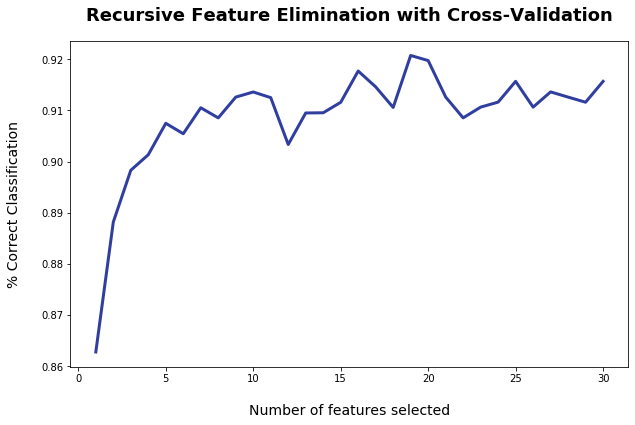

In [30]:
plt.figure(figsize=(10, 6))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [34]:
print(np.where(rfecv.support_ == False)[0])

X_rec=X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=False)

[ 1  2  3  6 15 18 21 24 27 28 29]


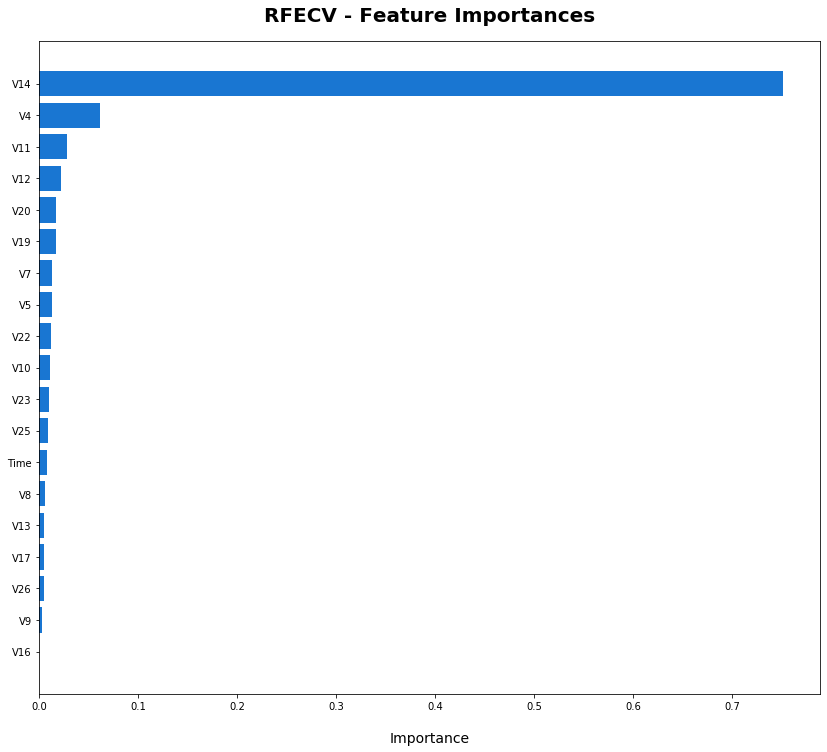

In [36]:
dset = pd.DataFrame()
dset['attr'] = X_rec.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)

plt.figure(figsize=(14, 12))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)

plt.axes().get_xaxis().set_visible(True)
plt.axes().get_yaxis().set_visible(True)

plt.show()

## Best solutions using all available features:

In [101]:
t0 = time.time()

sgb =GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500,
                                                            max_depth=5,min_samples_split=2)
sgb = sgb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = sgb.predict(X_test)

t1 = time.time()

sgb_score_accuracy = cross_val_score(sgb, X, y, cv=10, scoring='accuracy')
sgb_roc_auc = cross_val_score(sgb, X, y, cv=10, scoring='roc_auc')
sgb_score_precision = cross_val_score(sgb, X, y, cv=10, scoring='precision')
sgb_score_recall = cross_val_score(sgb, X, y, cv=10, scoring='recall')

t_org=t1-t0

print(sgb_roc_auc)
print("Mean AUC Score: ", sgb_roc_auc.mean())
print("Mean Accuracy Score: ", sgb_score_accuracy.mean())
print("Mean Precision Score: ", sgb_score_precision.mean())
print("Mean Recall: ", sgb_score_recall.mean())


print("Fitting undersample data took :{} sec".format(t1 - t0))

[0.98734694 0.95836735 0.97346939 0.96897959 0.97750937 0.99000416
 0.98958767 0.98084132 0.98625573 0.99000416]
Mean AUC Score:  0.9802365680966263
Mean Accuracy Score:  0.945124716553288
Mean Precision Score:  0.9647435541639983
Mean Recall:  0.9247755102040814
Fitting undersample data took :1.0416028499603271 sec


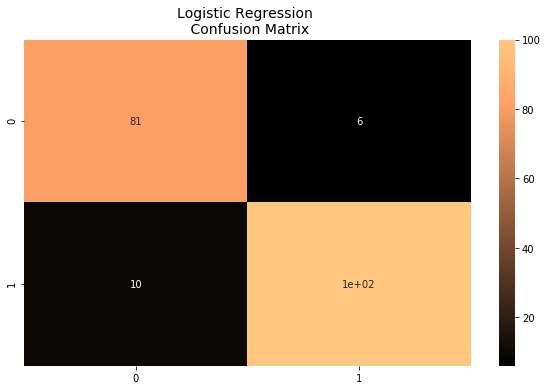

In [97]:
y_pred_sgb = sgb.predict(X_test)

sgb_cf = confusion_matrix(y_test, y_pred_sgb)

plt.figure(figsize=(10, 6))
sns.heatmap(sgb_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.show()

## Best solutions using a subset of features based on the feature importance values:

- I sort features based on their importance, and I create a subset with %70 of all features.

In [98]:
sgb = GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500,
                                                            max_depth=5,min_samples_split=2)

sgb = sgb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = sgb.predict(X_test)

feature_importances = pd.DataFrame(sgb.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)


X_less_feature=X[feature_importances.iloc[:21].index]

X_train_LF, X_test_LF, y_train_LF, y_test_LF = train_test_split(X_less_feature, y, test_size=0.2, random_state=42)

In [99]:
t0 = time.time()

sgb = GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500,
                                                            max_depth=5,min_samples_split=2)

sgb = sgb.fit(X_train_LF,y_train_LF)

#Predict the response for test dataset
y_pred = sgb.predict(X_test_LF)

t1 = time.time()

sgb_score_accuracy_SB = cross_val_score(sgb, X_less_feature, y, cv=10, scoring='accuracy')
sgb_roc_auc_SB = cross_val_score(sgb, X_less_feature, y, cv=10, scoring='roc_auc')
sgb_score_precision_SB = cross_val_score(sgb, X_less_feature, y, cv=10, scoring='precision')
sgb_score_recall_SB = cross_val_score(sgb, X_less_feature, y, cv=10, scoring='recall')
t_SB=t1-t0

print(sgb_roc_auc_SB)
print("Mean AUC Score: ", sgb_roc_auc_SB.mean())
print("Mean Accuracy Score: ", sgb_score_accuracy_SB.mean())
print("Mean Precision Score: ", sgb_score_precision_SB.mean())
print("Mean Recall: ", sgb_score_recall_SB.mean())

print("Fitting undersample data took :{} sec".format(t1 - t0))

[0.98122449 0.96816327 0.97755102 0.97142857 0.97126197 0.98708871
 0.99000416 0.98875469 0.98334027 0.99250312]
Mean AUC Score:  0.9811320283215327
Mean Accuracy Score:  0.9441352298495156
Mean Precision Score:  0.9662434752304756
Mean Recall:  0.920734693877551
Fitting undersample data took :0.8162930011749268 sec


## Best solutions using a subset of features based on the RFE process

In [93]:
X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X_rec, y, test_size=0.2, random_state=42)

t0 = time.time()

sgb_RFE =GradientBoostingClassifier(random_state=10,learning_rate=0.15, n_estimators= 500,
                                                            max_depth=5,min_samples_split=2)
sgb_RFE = sgb_RFE.fit(X_train_RFE,y_train_RFE)

#Predict the response for test dataset
y_pred = sgb_RFE.predict(X_test_RFE)

t1 = time.time()

sgb_score_accuracy_RFE = cross_val_score(sgb_RFE, X_rec, y, cv=10, scoring='accuracy')
sgb_roc_auc_RFE = cross_val_score(sgb_RFE, X_rec, y, cv=10, scoring='roc_auc')
sgb_score_precision_RFE = cross_val_score(sgb_RFE, X_rec, y, cv=10, scoring='precision')
sgb_score_recall_RFE = cross_val_score(sgb_RFE, X_rec, y, cv=10, scoring='recall')

t_RFE=t1-t0

print(sgb_roc_auc_RFE)
print("Mean AUC Score: ", sgb_roc_auc_RFE.mean())
print("Mean Accuracy Score: ", sgb_score_accuracy_RFE.mean())
print("Mean Precision Score: ", sgb_score_precision_RFE.mean())
print("Mean Recall: ", sgb_score_recall_RFE.mean())

print("Fitting undersample data took :{} sec".format(t1 - t0))


[0.98612245 0.97469388 0.9955102  0.98693878 0.96459808 0.99333611
 0.98500625 0.97167847 0.98375677 0.98000833]
Mean AUC Score:  0.9821649312786338
Mean Accuracy Score:  0.9369923727066585
Mean Precision Score:  0.9599659534993883
Mean Recall:  0.9144489795918368
Fitting undersample data took :0.8396942615509033 sec


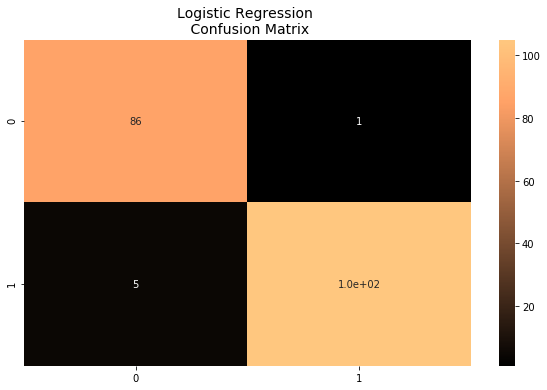

In [95]:
y_pred_sgb = sgb_RFE.predict(X_test_RFE)

sgb_cf = confusion_matrix(y_test_RFE, y_pred_sgb)

plt.figure(figsize=(10, 6))
sns.heatmap(sgb_cf,  annot=True, cmap=plt.cm.copper)
plt.title("Logistic Regression \n Confusion Matrix", fontsize=14)

plt.show()

# Conclusion (Comparison of 3 model performance)

In [107]:
print('\033[1m' + "Model performance with all available features (30 Feature):"+'\033[0m')
print("Mean AUC Score: ", sgb_roc_auc.mean())
print("Mean Accuracy Score: ", sgb_score_accuracy.mean())
print("Mean Precision Score: ", sgb_score_precision.mean())
print("Mean Recall: ", sgb_score_recall.mean())
print("Fitting undersample data took :{} sec".format(t_org))
print("")

print('\033[1m'+"Model performance with %70 of the features (21 Feature):"+'\033[0m')
print("Mean AUC Score: ", sgb_roc_auc_SB.mean())
print("Mean Accuracy Score: ", sgb_score_accuracy_SB.mean())
print("Mean Precision Score: ", sgb_score_precision_SB.mean())
print("Mean Recall: ", sgb_score_recall_SB.mean())
print("Fitting undersample data took :{} sec".format(t_SB))
print("")

print('\033[1m'+"Model performance with RFE feature elimination (19 Feature):"+'\033[0m')
print("Mean AUC Score: ", sgb_roc_auc_RFE.mean())
print("Mean Accuracy Score: ", sgb_score_accuracy_RFE.mean())
print("Mean Precision Score: ", sgb_score_precision_RFE.mean())
print("Mean Recall: ", sgb_score_recall_RFE.mean())
print("Fitting undersample data took :{} sec".format(t_RFE))




Model performance with all available features (30 Feature):
Mean AUC Score:  0.9802365680966263
Mean Accuracy Score:  0.945124716553288
Mean Precision Score:  0.9647435541639983
Mean Recall:  0.9247755102040814
Fitting undersample data took :1.0416028499603271 sec

Model performance with %70 of the features (21 Feature):
Mean AUC Score:  0.9811320283215327
Mean Accuracy Score:  0.9441352298495156
Mean Precision Score:  0.9662434752304756
Mean Recall:  0.920734693877551
Fitting undersample data took :0.8162930011749268 sec

Model performance with RFE feature elimination (19 Feature):
Mean AUC Score:  0.9821649312786338
Mean Accuracy Score:  0.9369923727066585
Mean Precision Score:  0.9599659534993883
Mean Recall:  0.9144489795918368
Fitting undersample data took :0.8396942615509033 sec


### There is no big difference between model performances. Also all of 3 model fit nearly in 1 second (because of undersampling).

### However if we decide champion model with ROC_AUC score, Gradient Boosting with RFE feauture elimination has highest ROC_AUC score and great fitting time.